<a href="https://colab.research.google.com/github/ceroytres/Learning_RL/blob/main/Problem_2_5_bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import Optional, Callable

import numpy as np
import matplotlib.pyplot as plt
import tabulate

In [2]:
def rand_argmax(A: np.ndarray) -> int:
  """
  Argmax with random tie breaking

  """
  return np.random.choice(np.flatnonzero(A == A.max()))

class StationaryBandit():

  def __init__(self) -> None:
    self.q_mu = [.3, -.9, 1.5, .5, 1, -1.5, -.1, -1, .85, -.5]
    self.optimal_action = np.argmax(self.q_mu)
  
  def sample(self, k: int) -> float:
    return self.q_mu[k] +  np.random.randn()
  
  def is_optimal(self, A: int) -> bool:
    return A == self.optimal_action

class NonStationaryBandit():

  def __init__(self) -> None:
    self.q_mu = np.zeros((10,))
  
  def sample(self, k: int):
    r = self.q_mu[k] + np.random.randn()
    
    self.optimal_action = self.q_mu.argmax()

    self.q_mu += 0.01*np.random.randn(10)

    return r

  def is_optimal(self, A: int) -> bool:
    return A == self.optimal_action



class Agent():

  def __init__(self, num_actions: int, eps: float,
               step_size: Optional[Callable[[int],float]] = None)->None:
    
    self.eps = eps
    self.num_actions = num_actions

    self.Q = np.zeros((num_actions,))
    self.N = np.zeros((num_actions,))
    self.R_avg = 0

    if step_size is None:
      self.step_size = lambda N: 1/N
    else:
      self.step_size = step_size

  def step(self) -> int:
    if np.random.rand() < 1 - self.eps:
      A = rand_argmax(self.Q)
    else:
      A = np.random.randint(0, self.num_actions)
    return A

  def update(self, R: float, A: int):
    self.N[A] = self.N[A] + 1
    self.Q[A] = self.Q[A] + self.step_size(self.N[A])*(R - self.Q[A])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

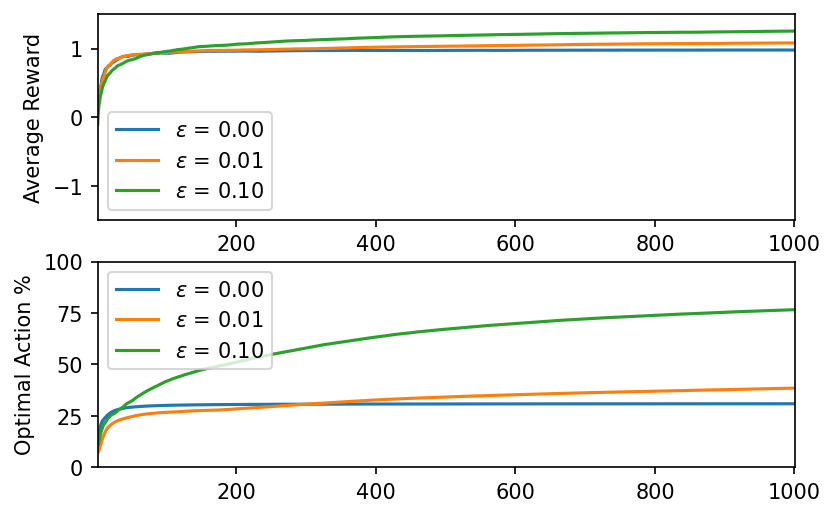

In [3]:
T = 1000
runs = 100

plt.figure(dpi=150)
for eps in [0, 0.01, 0.1]:
  r_eps = np.zeros((T,))
  percent_eps = np.zeros((T,))

  for r in range(runs):
    agent = Agent(10, eps)
    bandit = StationaryBandit()

    r_avg = np.zeros((T,))
    percent_opt = np.zeros((T,))

    for t in range(T):
      A = agent.step()
      R = bandit.sample(A)
      agent.update(R, A)

      percent_opt[t] = float(bandit.is_optimal(A))
      r_avg[t] = R
  
    t = np.arange(1, T+1)

    r_avg = np.cumsum(r_avg)/t
    percent_opt = np.cumsum(percent_opt)/t

    r_eps = r_eps + (1/(r+1))*(r_avg - r_eps)
    percent_eps = percent_eps + (1/(r+1)) * (percent_opt - percent_eps)
  
  t = np.arange(1, T+1)
  plt.subplot(2,1,1)
  plt.plot(t, r_eps, label=r"$\varepsilon$ = %.2f" % eps)
  plt.xlim([1,T+1])
  plt.ylim([-1.5,1.5])
  plt.ylabel("Average Reward")
  plt.legend()
  plt.subplot(2,1,2)
  plt.plot(t, 100*percent_eps, label=r"$\varepsilon$ = %.2f" % eps)
  plt.ylabel("Optimal Action %")
  plt.xlim([1,T+1])
  plt.ylim([0,100])
  plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


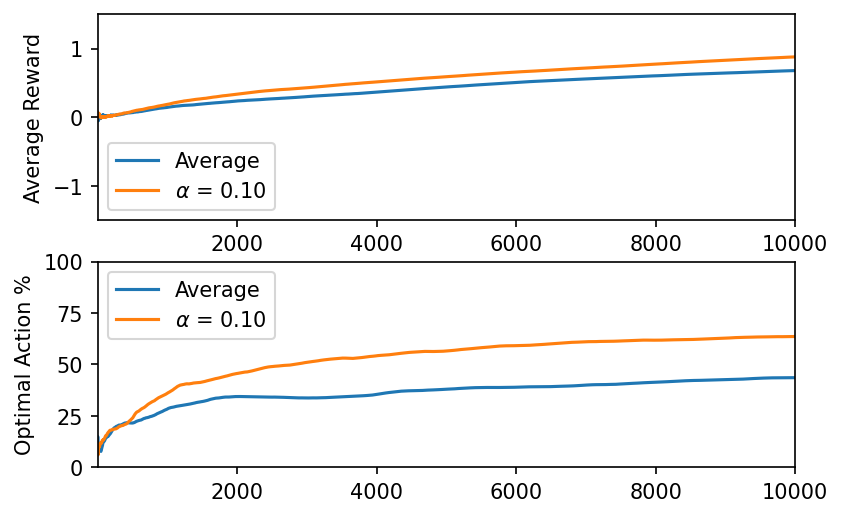

In [4]:
T = 10000
runs = 30
plt.figure(dpi=150)
for alpha in [None, 0.1]:
  r_alpha = np.zeros((T,))
  percent_alpha = np.zeros((T,))

  if not(alpha is None):
    step_size = lambda N: alpha
  else:
    step_size = None


  for r in range(runs):
    agent = Agent(10, .1, step_size=step_size)
    bandit = NonStationaryBandit()

    r_avg = np.zeros((T,))
    percent_opt = np.zeros((T,))

    for t in range(T):
      A = agent.step()
      R = bandit.sample(A)
      agent.update(R, A)

      percent_opt[t] = float(bandit.is_optimal(A))
      r_avg[t] = R
  
    t = np.arange(1, T+1)

    r_avg = np.cumsum(r_avg)/t
    percent_opt = np.cumsum(percent_opt)/t

    r_alpha = r_alpha + (1/(r+1))*(r_avg - r_alpha)
    percent_alpha = percent_alpha + (1/(r+1)) * (percent_opt - percent_alpha)
  
  t = np.arange(1, T+1)
  legend_str = "Average" if alpha is None else r"$\alpha$ = %.2f" % alpha
  plt.subplot(2,1,1)
  plt.plot(t, r_alpha, label=legend_str)
  plt.xlim([1,T+1])
  plt.ylim([-1.5,1.5])
  plt.ylabel("Average Reward")
  plt.legend()
  plt.subplot(2,1,2)
  plt.plot(t, 100*percent_alpha, label=legend_str)
  plt.ylabel("Optimal Action %")
  plt.xlim([1,T+1])
  plt.ylim([0,100])
  plt.legend()
plt.show()